## BUSA 423 - Final Exam
James Caudill - BUSA423.01W

*I had to run all plots in inline mode due to malfunctions with the widget backend. Individual plots can be run with %matplotlib widget for closer inspection of the data.*

In [20]:
import pandas as pd 
%matplotlib inline
data = pd.read_excel("data.xls")

data

,name,year,price,miles_driven,Region,fuel,transmission,mileage,horse_power,seats
0,Audi,2010,9733,34650,West,Gasoline,Automatic,28.9050,163.20,5
1,Audi,2017,22533,5040,South,Gasoline,Automatic,39.0100,177.50,5
2,Audi,2014,21333,27720,South,Diesel,Automatic,38.8925,147.51,5
3,Audi,2017,34667,44100,Central,Diesel,Automatic,47.8930,143.00,5
4,Audi,2019,82973,4914,Central,Gasoline,Automatic,35.8610,187.74,5
...,...,...,...,...,...,...,...,...,...,...
3318,Volvo,2019,50667,12600,West,Diesel,Automatic,42.3000,190.00,5
3319,Volvo,2019,50667,12600,Central,Diesel,Automatic,42.3000,190.00,5
3320,Volvo,2019,73333,10710,South,Diesel,Automatic,42.3000,190.00,5
3321,Volvo,2018,73333,31500,Central,Diesel,Automatic,26.3200,235.00,5


### Histogram

Categorized by year using 20 bins shows the following:
- in a range of 20 years from 2000 to 2020
- 2018 is the most available used car

<AxesSubplot:ylabel='Frequency'>

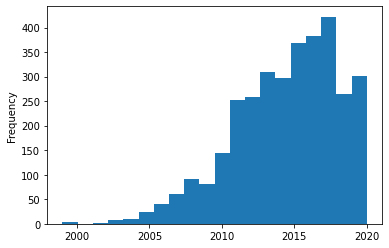

In [21]:
data['year'].plot.hist(bins=20)


## Bar Charts

<AxesSubplot:xlabel='name'>

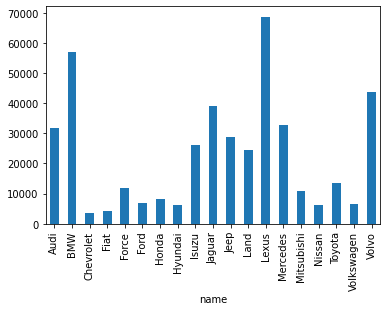

In [22]:
nameData = data.groupby('name')['price'].mean()
nameData.plot.bar(y='price', x='name')

## Line Chart

By plotting the average price by year, we can see that most newer cars are worth more. 

<AxesSubplot:xlabel='year'>

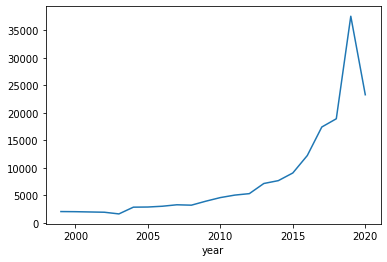

In [23]:
priceData = data.groupby('year')['price'].mean()
priceData.plot()

## Area Chart

Here I have separated the vehicles into 5 year groups. \
By comparing the number of cars in each group with Automatic or Manual transmisisons. \
We find that manual transmissions far out paced the automatics in this used car market data. 

<AxesSubplot:>

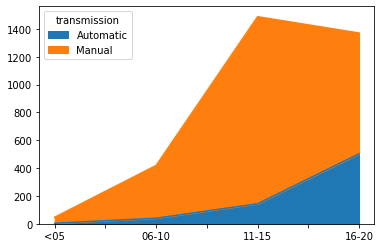

In [24]:

transData = pd.DataFrame({
    '<05': (data[data['year'] < 2006].groupby('transmission').size()),
    '06-10': (data[(data['year'] > 2005) & (data['year'] < 2011)].groupby('transmission').size()),
    '11-15': (data[(data['year'] > 2010) & (data['year'] < 2016)].groupby('transmission').size()),
    '16-20': (data[data['year'] > 2015].groupby('transmission').size())
})

transData.T.plot.area()

## Scatter Plot

A scatter plot of Mileage vs Horse Power shows an indication that as horse power increases mileage starts to decrease.\
However, there do appear to be a few outliers in the data. 

<AxesSubplot:xlabel='mileage', ylabel='horse_power'>

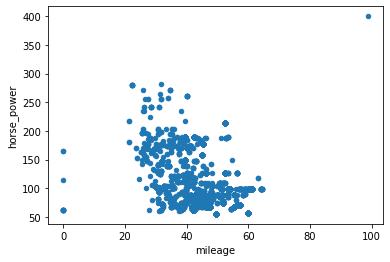

In [25]:
data[['mileage', 'horse_power']].plot.scatter(x='mileage', y='horse_power')

## Box Plot

A box plot shows there are more outliers than expected in the horse power data. \
Where the interactive chart shows the upper limit to be approx 189hp, making everything above an outlier. 

<AxesSubplot:>

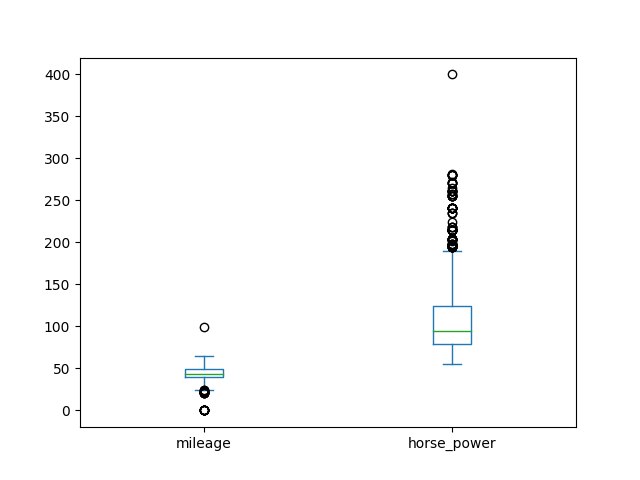

In [33]:
%matplotlib widget
data[['mileage', 'horse_power']].plot.box()

## Exploratory Data Analysis

Conclusions:
- median price is less than the mean price. 

In [34]:
# Summary Statistics

data.describe()

,year,price,miles_driven,mileage,horse_power,seats
count,3323.000000,3323.000000,3.323000e+03,3323.000000,3323.000000,3323.000000
mean,2014.190491,12115.888354,4.314015e+04,43.743896,106.387185,5.295516
std,3.440053,15203.179799,3.992027e+04,9.049754,41.932843,0.832404
min,1999.000000,600.000000,6.300000e+02,0.000000,55.200000,4.000000
25%,2012.000000,4047.000000,1.890000e+04,39.433000,78.900000,5.000000
50%,2015.000000,7333.000000,3.780000e+04,43.710000,94.930000,5.000000
75%,2017.000000,11333.000000,5.670000e+04,49.585000,123.700000,5.000000
max,2020.000000,133333.000000,1.487088e+06,98.700000,400.000000,10.000000


#### Removing outliers

Outliers were found in previous box plots.\
This step will attempt to eliminate some of them.\
Using the formula Max = 75% + 1.5* (75% - 25%) will remove the over outliers from the horse power data.  
Then we will remove all 0 mileage outliers from the data. 

In [40]:
maximum = 123.7 + 1.5 * (123.7 - 78.9)
newData = data[data['horse_power'] <= maximum] 
newData = newData[newData['mileage'] > 0]
newData

,name,year,price,miles_driven,Region,fuel,transmission,mileage,horse_power,seats
0,Audi,2010,9733,34650,West,Gasoline,Automatic,28.9050,163.20,5
1,Audi,2017,22533,5040,South,Gasoline,Automatic,39.0100,177.50,5
2,Audi,2014,21333,27720,South,Diesel,Automatic,38.8925,147.51,5
3,Audi,2017,34667,44100,Central,Diesel,Automatic,47.8930,143.00,5
4,Audi,2019,82973,4914,Central,Gasoline,Automatic,35.8610,187.74,5
...,...,...,...,...,...,...,...,...,...,...
3316,Volvo,2019,50667,12600,West,Diesel,Automatic,42.3000,190.00,5
3317,Volvo,2019,50667,12600,West,Diesel,Automatic,42.3000,190.00,5
3318,Volvo,2019,50667,12600,West,Diesel,Automatic,42.3000,190.00,5
3319,Volvo,2019,50667,12600,Central,Diesel,Automatic,42.3000,190.00,5


#### Looking for correlation

In [41]:
corr = newData.corr()
corr

,year,price,miles_driven,mileage,horse_power,seats
year,1.000000,0.487635,-0.456259,0.231712,0.259066,-0.104647
price,0.487635,1.000000,-0.245368,-0.196549,0.772755,0.043634
miles_driven,-0.456259,-0.245368,1.000000,-0.091860,-0.108025,0.273075
mileage,0.231712,-0.196549,-0.091860,1.000000,-0.364133,-0.501363
horse_power,0.259066,0.772755,-0.108025,-0.364133,1.000000,0.117848
seats,-0.104647,0.043634,0.273075,-0.501363,0.117848,1.000000


#### Create a correlation heat map to visualize the correlations

It appears that price and horse power are highly correlated. Meaning that horse power may be a good predictor of price. 

<AxesSubplot:>

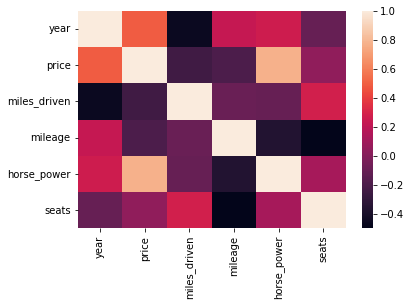

In [42]:
import seaborn as sns

sns.heatmap(corr)

#### Skewness

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'miles_driven'}>,
        <AxesSubplot:title={'center':'mileage'}>],
       [<AxesSubplot:title={'center':'horse_power'}>,
        <AxesSubplot:title={'center':'seats'}>]], dtype=object)

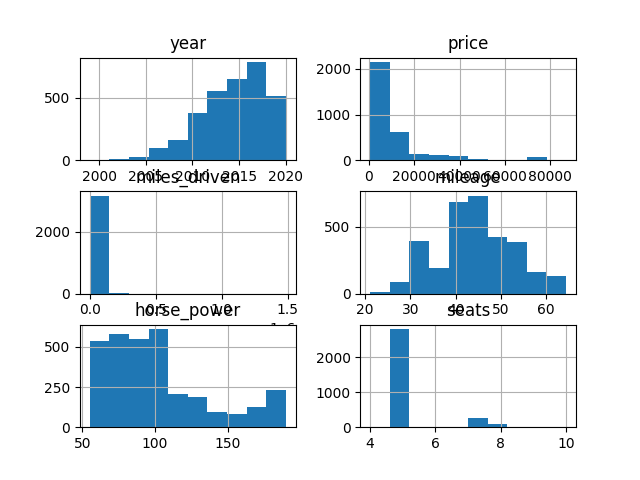

In [44]:
%matplotlib widget
newData.hist()